## Regression

`Regression is a statistical method used to predict the value of the dependent variable based on the known value of the
independent variable assuming relationship between two or more variables.`

## Linear Regression

If your data shows a linear relationship between the X and Y variables, you will want to find the line that best
fits that relationship. That line is called a Regression Line and has the equation `ŷ= c + mx`.<br>
The Least Squares Regression Line is the line that makes the vertical distance from the data points to the regression line as small as possible. It’s called a`least square` because the best line of fit is one that minimizes the variance (the sum of squares of the errors).<br><br>
`Hypothesis Function` - Function that best maps input to output.It is exactly the same as the equation of a line. <br>
`Cost Function` - Average of differences between predicted values and the actual values. Also known as the <b>squared error</b>.It measures the accuracy of our hypothesis function by using this.<br>
Minimising the cost of the prediction is the goal of accurate machine learning models.
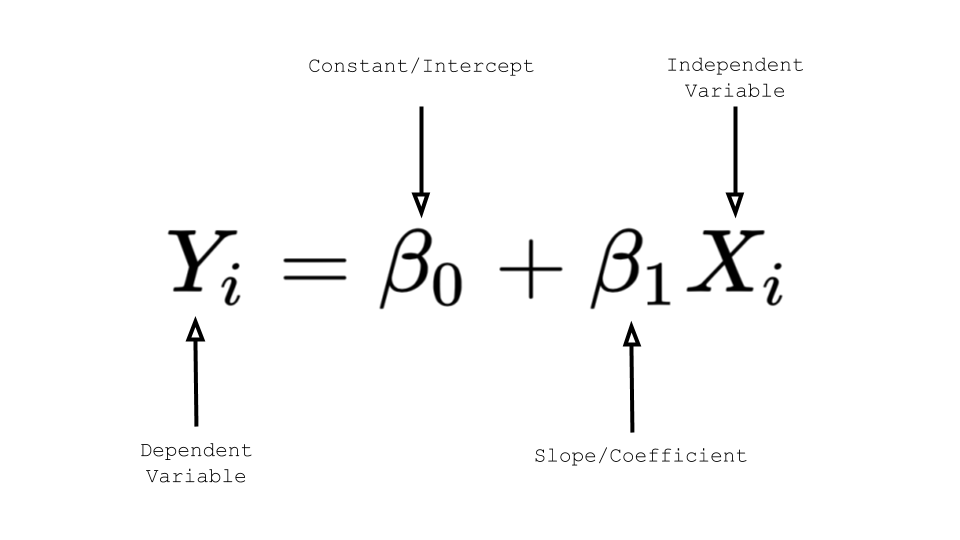

## Assumptions of Linear Regression
### Linearity
Relationship between input and output should be linear.<br>
The straight line should represent all points as good as possible.
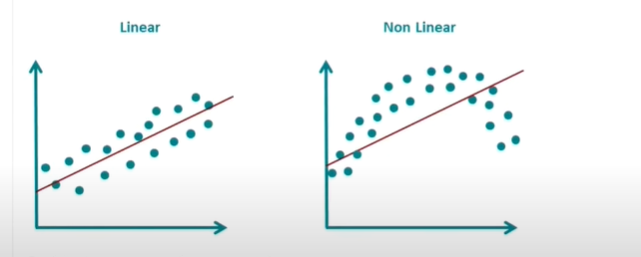


### No Multicollinearity
Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. This means that an independent variable can be predicted from another independent variable in a regression model.
### Homoscedasticity
Homoscedasticity describes a situation in which the error term is the same across all values of the independent variables. 
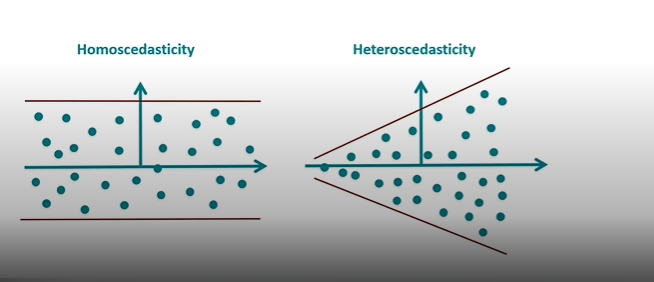
### Normality
For any fixed value of X, Y is normally distributed.


### No AutoCorrelation of error
There is no autocorrelation between errors. There should be no correlation between the current and the past values of the independent variable.
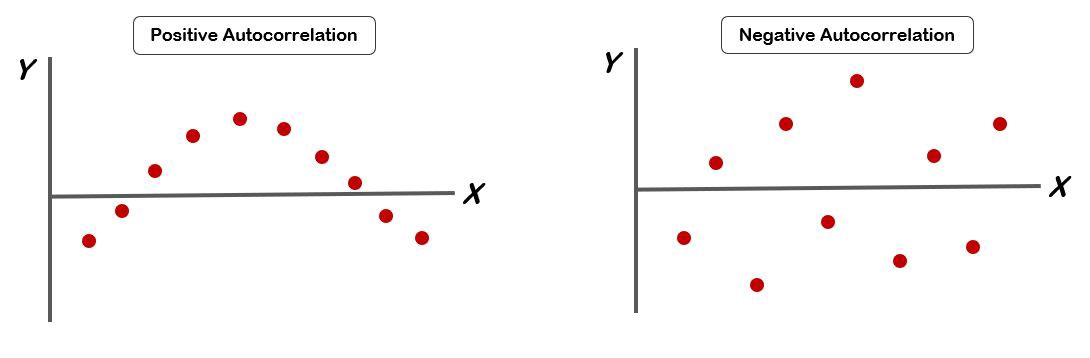

# Linear Regression with OLS

`Ordinary least squares regression is a way to find the line of best fit for a set of data. It does this by creating a model that minimizes the sum of the squared vertical distances (residuals).`<br>
The least squares method is a statistical procedure to find the best fit for a set of data points by minimizing the sum of the offsets or residuals of points from the plotted curve.<br>
The equation of a straight line is written using the `y = mx + b`, where m is the slope (Gradient) and b is y-intercept.
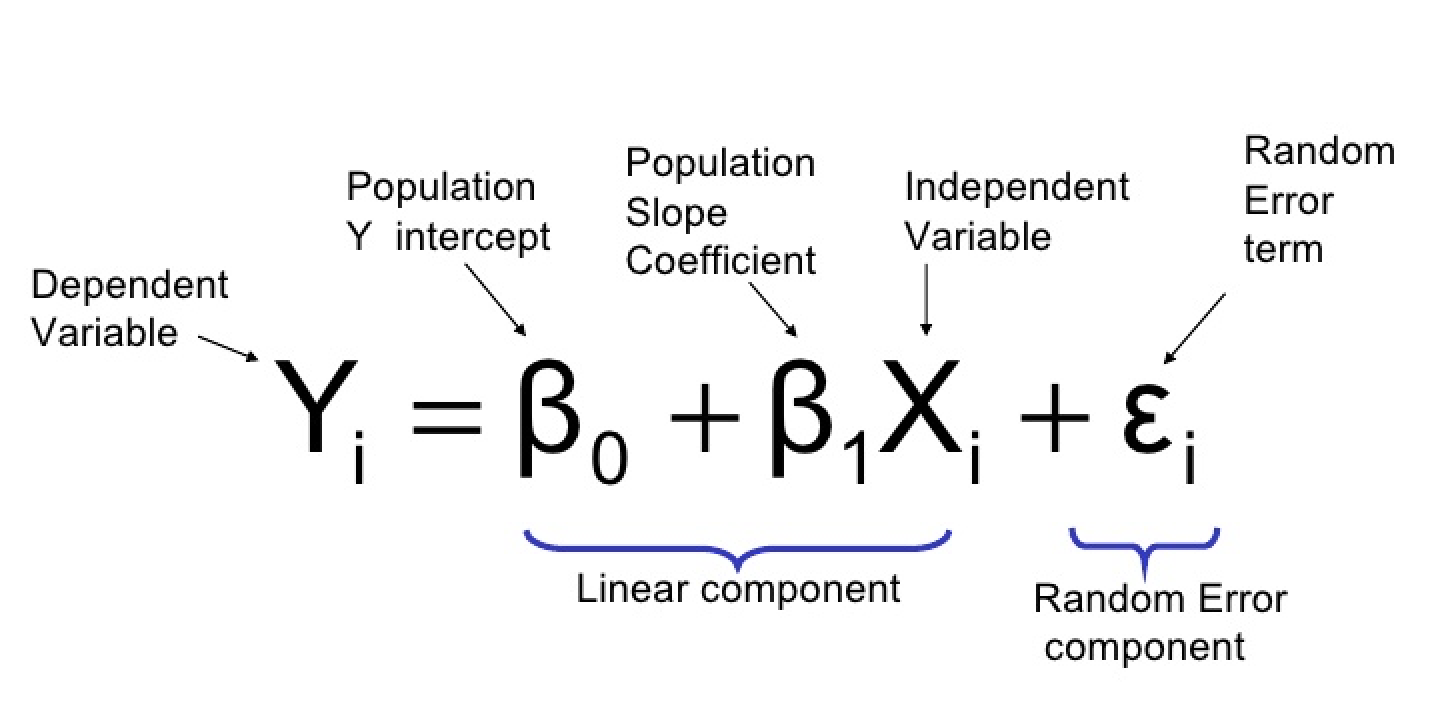

e is the error term; the error in predicting the value of Y, given the value of X (it is not displayed in most regression equations).


In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
dataset = pd.read_csv('bmi.csv')
dataset

,Weight,Height
0,28.0,121.92
1,28.1,124.46
2,28.2,127.00
3,28.3,129.54
4,28.4,132.08
5,28.5,134.62
6,35.2,137.16
7,37.6,139.70
8,40.0,142.24
9,42.6,144.78


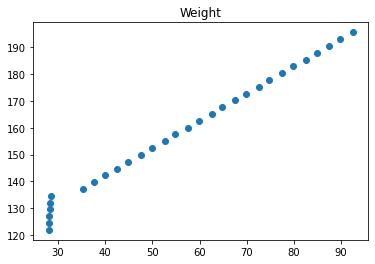

In [6]:
#Linearity
plt.scatter(dataset['Weight'],dataset['Height'])
plt.title("Weight")
plt.show()

<AxesSubplot:>

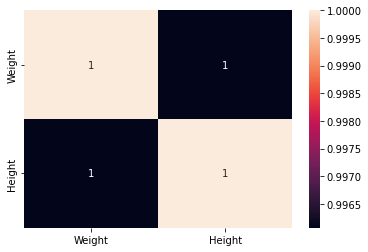

In [7]:
# Correlation
sns.heatmap(dataset[['Weight','Height']].corr(), annot=True)

In [8]:
# Splitting train and test datasets
x = dataset['Weight'].values.reshape((-1,1))
y = dataset['Height'].values.reshape((-1,1))
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [9]:
regression = LinearRegression()
regression.fit(x_train.reshape((-1, 1)),y_train.reshape((-1, 1)))

LinearRegression()

In [10]:
# Prediction
y_p = regression.predict(x_test)
# MSE
math.sqrt(mean_squared_error(y_test,y_p))

0.4300714682534485

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). In the general case when the true y is non-constant, a constant model that always predicts the average y disregarding the input features would get a  score of 0.0.

In [11]:
r2_score(y_test, y_p) #Accuracy

0.9993750818426556

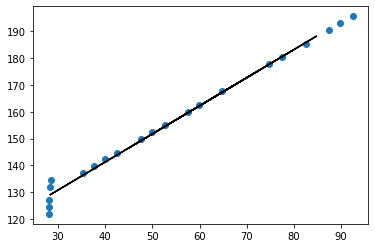

In [12]:
plt.scatter(x_train, y_train) 
plt.plot(x_test, y_p, color='k')  # regression line
plt.show()

# Multiple Linear Regression with OLS

Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable.<br>
`If we have more than two independent variables then the linear regression is called Multivariate Linear Regression.`
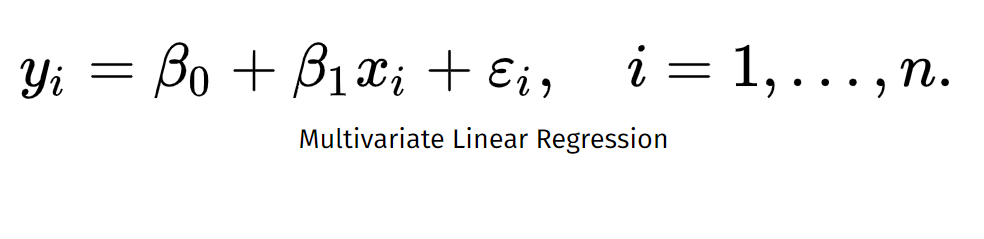


`If we have more than two independent variables then the linear regression is called Multivariate Linear Regression.`
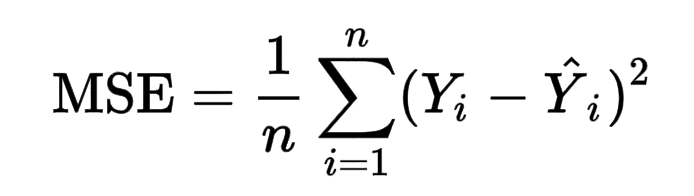

In [13]:
df = pd.read_csv('bmi_multiple.csv')
df

,Height,Weight,Index
0,174,96,31.7
1,189,87,24.4
2,185,110,22.1
3,195,104,27.4
4,149,61,27.5
5,189,104,29.0
6,147,92,42.3
7,174,90,29.7
8,169,103,36.1
9,195,81,21.3


In [14]:
# dependent variable
dependent_variable = 'Index'
#list of indepentdent variables
independent_varaibles = df.columns.tolist() 
independent_varaibles.remove(dependent_variable)

In [15]:
X = df[independent_varaibles].values
y = df[dependent_variable].values
X

array([[174,  96],
       [189,  87],
       [185, 110],
       [195, 104],
       [149,  61],
       [189, 104],
       [147,  92],
       [174,  90],
       [169, 103],
       [195,  81],
       [159,  80],
       [192, 101],
       [155,  51]], dtype=int64)

`test_set` -> It represents the proportion of the dataset to include in the test split.<br>
`random state` -> It controls the shuffling process. With random_state=0 , we get the same train and test sets across different executions.

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

`MinMaxScalar` Transform features by scaling each feature to a given range.<br>
This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [17]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:
# Error (actual-predicted)
y_pred = model.predict(X_test)
residual = y_test - y_pred

In [20]:
# MSE
math.sqrt(mean_squared_error(y_test,y_pred))

5.8027416084707095

In [21]:
r2_score(y_test, y_pred)

-1.9608098636779276

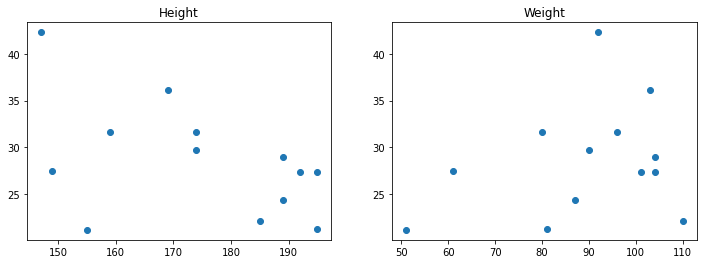

In [22]:
#Linearity
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
ax1.scatter(df['Height'],df['Index'])
ax1.set_title("Height")
ax2.scatter(df['Weight'],df['Index'])
ax2.set_title("Weight")
plt.show()

<AxesSubplot:>

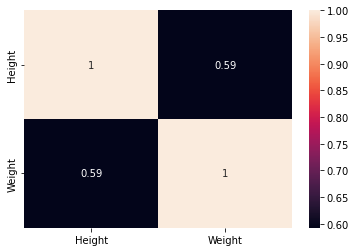

In [23]:
# Multicollinearity
sns.heatmap(df[independent_varaibles].corr(), annot=True)

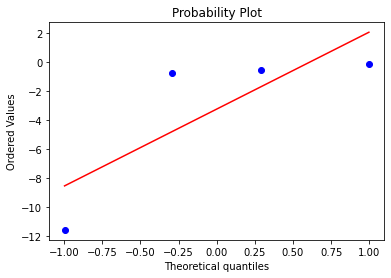

In [24]:
# Normal Redisual(error)
import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)
plt.show()

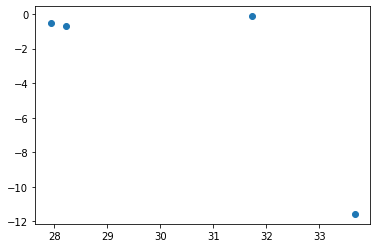

In [25]:
#Homoscedasticity
plt.scatter(y_pred,residual)

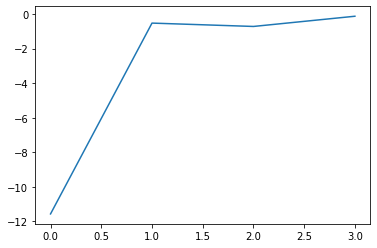

In [26]:
# Autocorrelation
plt.plot(residual)